# **Desafio analisis de datos: TelecomX_LATAM_2**

## **Extracción del Archivo Tratado**

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('/content/data_normalizada_columna_nueva.csv')

In [8]:
data

,Unnamed: 0,ID_Cliente,Evasion,Genero_Cliente,Tercera_Edad,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0,0002-ORFBO,0,Female,0,1,1,9,1,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,1,0003-MKNFE,0,Male,0,0,0,9,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,2,0004-TLHLJ,1,Male,0,0,0,4,1,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,3,0011-IGKFF,1,Male,1,1,0,13,1,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,4,0013-EXCHZ,1,Female,1,1,0,3,1,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,7262,9987-LUTYD,0,Female,0,0,0,13,1,0,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,7263,9992-RRAMN,1,Male,0,1,0,22,1,1,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,7264,9992-UJOEL,0,Male,0,0,0,2,1,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,7265,9993-LHIEB,0,Male,0,1,1,67,1,0,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [9]:
data.shape

(7267, 23)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7267 non-null   int64  
 1   ID_Cliente              7267 non-null   object 
 2   Evasion                 7267 non-null   int64  
 3   Genero_Cliente          7267 non-null   object 
 4   Tercera_Edad            7267 non-null   int64  
 5   Tiene_Pareja            7267 non-null   int64  
 6   Tiene_Dependientes      7267 non-null   int64  
 7   Meses_Contrato          7267 non-null   int64  
 8   Servicio_Telefonico     7267 non-null   int64  
 9   Multiples_Lineas        7267 non-null   int64  
 10  Servicio_Internet       7267 non-null   object 
 11  Seguridad_Online        7267 non-null   int64  
 12  Respaldo_Online         7267 non-null   int64  
 13  Proteccion_Dispositivo  7267 non-null   int64  
 14  Soporte_Tecnico         7267 non-null   

## **Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [11]:
# Eliminar columnas no predictivas
data = data.drop(columns=["Unnamed: 0", "ID_Cliente"])

# Confirmamos dimensiones después de la limpieza
print(data.shape)
print(data.head())

(7267, 21)
   Evasion Genero_Cliente  Tercera_Edad  Tiene_Pareja  Tiene_Dependientes  \
0        0         Female             0             1                   1   
1        0           Male             0             0                   0   
2        1           Male             0             0                   0   
3        1           Male             1             1                   0   
4        1         Female             1             1                   0   

   Meses_Contrato  Servicio_Telefonico  Multiples_Lineas Servicio_Internet  \
0               9                    1                 0               DSL   
1               9                    1                 1               DSL   
2               4                    1                 0       Fiber optic   
3              13                    1                 0       Fiber optic   
4               3                    1                 0       Fiber optic   

   Seguridad_Online  ...  Proteccion_Dispositivo  Soporte

## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [12]:
# Variables categóricas a transformar
cat_cols = ["Genero_Cliente", "Servicio_Internet", "Tipo_Contrato", "Metodo_Pago"]

# One-Hot Encoding con get_dummies
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Confirmamos dimensiones y primeras filas
print("Shape después de codificación:", data_encoded.shape)
print(data_encoded.head())

Shape después de codificación: (7267, 25)
   Evasion  Tercera_Edad  Tiene_Pareja  Tiene_Dependientes  Meses_Contrato  \
0        0             0             1                   1               9   
1        0             0             0                   0               9   
2        1             0             0                   0               4   
3        1             1             1                   0              13   
4        1             1             1                   0               3   

   Servicio_Telefonico  Multiples_Lineas  Seguridad_Online  Respaldo_Online  \
0                    1                 0                 0                1   
1                    1                 1                 0                0   
2                    1                 0                 0                0   
3                    1                 0                 0                1   
4                    1                 0                 0                0   

   Proteccion_

In [13]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Evasion                              7267 non-null   int64  
 1   Tercera_Edad                         7267 non-null   int64  
 2   Tiene_Pareja                         7267 non-null   int64  
 3   Tiene_Dependientes                   7267 non-null   int64  
 4   Meses_Contrato                       7267 non-null   int64  
 5   Servicio_Telefonico                  7267 non-null   int64  
 6   Multiples_Lineas                     7267 non-null   int64  
 7   Seguridad_Online                     7267 non-null   int64  
 8   Respaldo_Online                      7267 non-null   int64  
 9   Proteccion_Dispositivo               7267 non-null   int64  
 10  Soporte_Tecnico                      7267 non-null   int64  
 11  Streaming_TV                  

In [15]:
data_encoded = data_encoded.fillna(0).astype(int)

In [16]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Evasion                              7267 non-null   int64
 1   Tercera_Edad                         7267 non-null   int64
 2   Tiene_Pareja                         7267 non-null   int64
 3   Tiene_Dependientes                   7267 non-null   int64
 4   Meses_Contrato                       7267 non-null   int64
 5   Servicio_Telefonico                  7267 non-null   int64
 6   Multiples_Lineas                     7267 non-null   int64
 7   Seguridad_Online                     7267 non-null   int64
 8   Respaldo_Online                      7267 non-null   int64
 9   Proteccion_Dispositivo               7267 non-null   int64
 10  Soporte_Tecnico                      7267 non-null   int64
 11  Streaming_TV                         7267 non-null   int

## **Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:

In [17]:
# Mostrar proporción relativa
churn_proportion = data_encoded['Evasion'].value_counts(normalize=True)
print("\nProporción de clases:")
print(churn_proportion)


Proporción de clases:
Evasion
0    0.74281
1    0.25719
Name: proportion, dtype: float64


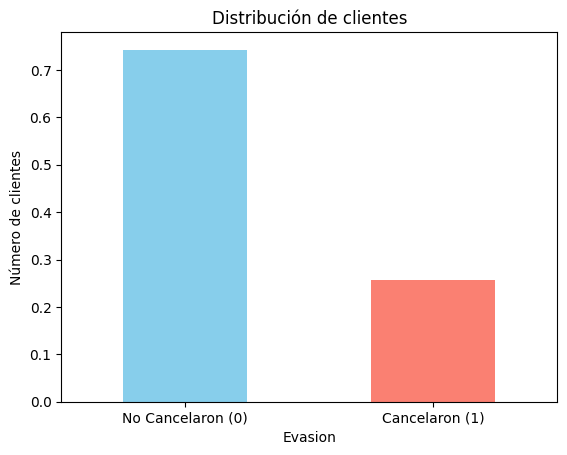

In [19]:
# Visualización rápida
import matplotlib.pyplot as plt

churn_proportion.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(ticks=[0,1], labels=['No Cancelaron (0)', 'Cancelaron (1)'], rotation=0)
plt.title("Distribución de clientes")
plt.ylabel("Número de clientes")
plt.show()

## **Balanceo de Clases (opcional)**

Separar features (X) y target (y):

In [21]:
# Target
y = data_encoded["Evasion"]

# Features
X = data_encoded.drop(columns=["Evasion"])


Undersampling (reducir la clase mayoritaria):

In [22]:
from imblearn.under_sampling import RandomUnderSampler

X_under, y_under = RandomUnderSampler(random_state=42).fit_resample(X, y)

print("Distribución después de undersampling:")
print(y_under.value_counts(normalize=True))


Distribución después de undersampling:
Evasion
0    0.5
1    0.5
Name: proportion, dtype: float64


Oversampling (replicar clase minoritaria):

In [23]:
from imblearn.over_sampling import RandomOverSampler

X_over, y_over = RandomOverSampler(random_state=42).fit_resample(X, y)

print("Distribución después de oversampling:")
print(y_over.value_counts(normalize=True))


Distribución después de oversampling:
Evasion
0    0.5
1    0.5
Name: proportion, dtype: float64


SMOTE (Synthetic Minority Oversampling Technique)

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_smote.value_counts(normalize=True))


Distribución después de SMOTE:
Evasion
0    0.5
1    0.5
Name: proportion, dtype: float64


In [27]:
data_encoded.to_csv('data_encoded.csv')

## **Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

No hay necesidad de normalizar los datos.

## **Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Calculamos la matriz de correlación
corr_matrix = data_encoded.corr()

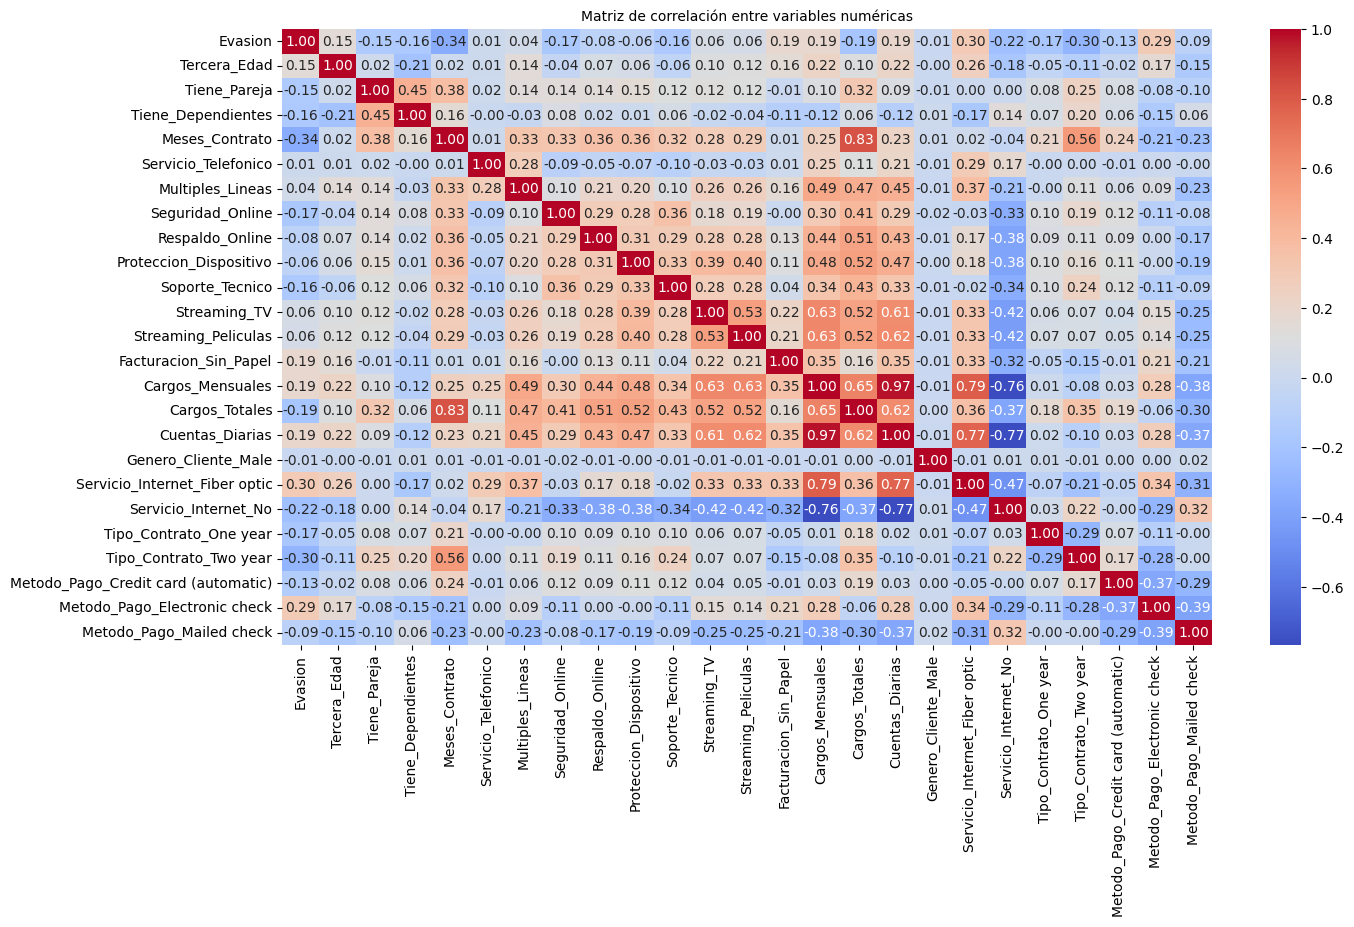

In [32]:
# Visualizamos la matriz
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre variables numéricas", fontsize=10)
plt.show()

In [33]:
# Correlación con la variable objetivo 'Evasion'
cor_target = corr_matrix['Evasion'].sort_values(ascending=False)
print("Correlación de las variables con 'Evasion':\n")
print(cor_target)

Correlación de las variables con 'Evasion':

Evasion                                1.000000
Servicio_Internet_Fiber optic          0.300949
Metodo_Pago_Electronic check           0.294626
Cuentas_Diarias                        0.192562
Cargos_Mensuales                       0.189907
Facturacion_Sin_Papel                  0.186666
Tercera_Edad                           0.146733
Streaming_TV                           0.062430
Streaming_Peliculas                    0.060586
Multiples_Lineas                       0.039343
Servicio_Telefonico                    0.012571
Genero_Cliente_Male                   -0.009555
Proteccion_Dispositivo                -0.063452
Respaldo_Online                       -0.080163
Metodo_Pago_Mailed check              -0.090061
Metodo_Pago_Credit card (automatic)   -0.131085
Tiene_Pareja                          -0.148546
Soporte_Tecnico                       -0.160440
Tiene_Dependientes                    -0.161384
Seguridad_Online                      -0.16

## **Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [35]:
from sklearn.model_selection import train_test_split

# Supongamos que tus features están en X y la variable target (cancelación) en y
# División 70% entrenamiento y 30% prueba
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under,
    test_size=0.3,   # 30% test
    random_state=42, # semilla para reproducibilidad
    stratify=y_under       # mantiene la proporción de clases (muy útil si hay desbalanceo)
)

print("Tamaño entrenamiento:", X_train_under.shape)
print("Tamaño prueba:", X_test_under.shape)


Tamaño entrenamiento: (2616, 24)
Tamaño prueba: (1122, 24)


In [36]:
from sklearn.model_selection import train_test_split

# Supongamos que tus features están en X y la variable target (cancelación) en y
# División 70% entrenamiento y 30% prueba
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over,
    test_size=0.3,   # 30% test
    random_state=42, # semilla para reproducibilidad
    stratify=y_over       # mantiene la proporción de clases (muy útil si hay desbalanceo)
)

print("Tamaño entrenamiento:", X_train_over.shape)
print("Tamaño prueba:", X_test_over.shape)


Tamaño entrenamiento: (7557, 24)
Tamaño prueba: (3239, 24)


In [37]:
from sklearn.model_selection import train_test_split

# Supongamos que tus features están en X y la variable target (cancelación) en y
# División 70% entrenamiento y 30% prueba
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote,
    test_size=0.3,   # 30% test
    random_state=42, # semilla para reproducibilidad
    stratify=y_smote   # mantiene la proporción de clases (muy útil si hay desbalanceo)
)

print("Tamaño entrenamiento:", X_train_smote.shape)
print("Tamaño prueba:", X_test_smote.shape)

Tamaño entrenamiento: (7557, 24)
Tamaño prueba: (3239, 24)


## **Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [38]:
from sklearn.preprocessing import StandardScaler

# Normalización SOLO para modelos sensibles a la escala
scaler = StandardScaler()

**Undersampling (reducir la clase mayoritaria):**

In [42]:
X_train_scaled_under = scaler.fit_transform(X_train_under)
X_test_scaled_under = scaler.transform(X_test_under)

Regresión Logística (con normalización)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modelo con datos escalados
log_reg_under = LogisticRegression(max_iter=1000, random_state=42)
log_reg_under.fit(X_train_scaled_under, y_train_under)

y_pred_log_under = log_reg_under.predict(X_test_scaled_under)

print("📌 Regresión Logística")
print(confusion_matrix(y_test_under, y_pred_log_under))
print(classification_report(y_test_under, y_pred_log_under))


📌 Regresión Logística
[[404 157]
 [105 456]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       561
           1       0.74      0.81      0.78       561

    accuracy                           0.77      1122
   macro avg       0.77      0.77      0.77      1122
weighted avg       0.77      0.77      0.77      1122



Random Forest (sin normalización):

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_under = RandomForestClassifier(n_estimators=100, random_state=42)
rf_under.fit(X_train_under, y_train_under)

y_pred_rf_under = rf_under.predict(X_test_under)

print("📌 Random Forest")
print(confusion_matrix(y_test_under, y_pred_rf_under))
print(classification_report(y_test_under, y_pred_rf_under))


📌 Random Forest
[[414 147]
 [130 431]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       561
           1       0.75      0.77      0.76       561

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



**Oversampling (replicar clase minoritaria):**

In [41]:
X_train_scaled_over = scaler.fit_transform(X_train_over)
X_test_scaled_over = scaler.transform(X_test_over)

Regresión Logística (con normalización)

In [46]:
# Modelo con datos escalados
log_reg_over = LogisticRegression(max_iter=1000, random_state=42)
log_reg_over.fit(X_train_scaled_over, y_train_over)

y_pred_log_over = log_reg_over.predict(X_test_scaled_over)

print("📌 Regresión Logística")
print(confusion_matrix(y_test_over, y_pred_log_over))
print(classification_report(y_test_over, y_pred_log_over))

📌 Regresión Logística
[[1170  450]
 [ 309 1310]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1620
           1       0.74      0.81      0.78      1619

    accuracy                           0.77      3239
   macro avg       0.77      0.77      0.77      3239
weighted avg       0.77      0.77      0.77      3239



Random Forest (sin normalización):

In [50]:
rf_over = RandomForestClassifier(n_estimators=100, random_state=42)
rf_over.fit(X_train_over, y_train_over)

y_pred_rf_over = rf_over.predict(X_test_over)

print("📌 Random Forest")
print(confusion_matrix(y_test_over, y_pred_rf_over))
print(classification_report(y_test_over, y_pred_rf_over))


📌 Random Forest
[[1325  295]
 [  73 1546]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1620
           1       0.84      0.95      0.89      1619

    accuracy                           0.89      3239
   macro avg       0.89      0.89      0.89      3239
weighted avg       0.89      0.89      0.89      3239



**SMOTE (Synthetic Minority Oversampling Technique):**

In [47]:
X_train_scaled_smote = scaler.fit_transform(X_train_smote)
X_test_scaled_smote = scaler.transform(X_test_smote)

Regresión Logística (con normalización)

In [48]:
# Modelo con datos escalados
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_scaled_smote, y_train_smote)

y_pred_log_smote = log_reg_smote.predict(X_test_scaled_smote)

print("📌 Regresión Logística")
print(confusion_matrix(y_test_smote, y_pred_log_smote))
print(classification_report(y_test_smote, y_pred_log_smote))

📌 Regresión Logística
[[1329  291]
 [ 267 1352]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1620
           1       0.82      0.84      0.83      1619

    accuracy                           0.83      3239
   macro avg       0.83      0.83      0.83      3239
weighted avg       0.83      0.83      0.83      3239



Random Forest (sin normalización):

In [51]:
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_rf_smote = rf_smote.predict(X_test_smote)

print("📌 Random Forest")
print(confusion_matrix(y_test_smote, y_pred_rf_smote))
print(classification_report(y_test_smote, y_pred_rf_smote))


📌 Random Forest
[[1336  284]
 [ 237 1382]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1620
           1       0.83      0.85      0.84      1619

    accuracy                           0.84      3239
   macro avg       0.84      0.84      0.84      3239
weighted avg       0.84      0.84      0.84      3239



## **Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

**Undersampling**

**Regresión Logística**

Accuracy: 0.77

Precisión: 0.74–0.79

Recall: 0.72–0.81

F1-score: 0.76–0.78

Buen equilibrio entre precisión y recall, aunque se pierde información al reducir la clase mayoritaria.

**Random Forest**

Accuracy: 0.75

Métricas similares, pero ligeramente inferiores a la regresión logística.

Conclusión: ambos modelos funcionan de manera equilibrada, pero undersampling reduce la muestra y limita la capacidad predictiva.

**Oversampling**

**Regresión Logística**

Accuracy: 0.77

Comportamiento casi idéntico al obtenido con undersampling.

**Random Forest**

Accuracy: 0.89

Muy alto recall para la clase 1 (clientes que cancelan, 0.95) y precisión de 0.84.

Es el modelo con mejor desempeño general.

👉 Conclusión: Oversampling mejora mucho a Random Forest, probablemente porque aprovecha toda la información sin eliminar registros.

**SMOTE**

**Regresión Logística**

Accuracy: 0.83

Métricas equilibradas (precision ≈ recall ≈ f1).

Mejor que con oversampling simple.

**Random Forest**

Accuracy: 0.84

Buen equilibrio, pero ligeramente inferior al Random Forest con oversampling.

👉 Conclusión: SMOTE ayuda a balancear las clases de forma más natural que oversampling, logrando métricas más consistentes.

**Mejor desempeño global:**
**Random Forest con Oversampling **(accuracy 0.89, alto recall de 0.95 para la clase positiva).
Esto significa que el modelo identifica muy bien a los clientes que cancelan, lo cual es estratégico para la empresa.

**Posible overfitting:**
El rendimiento de Random Forest con oversampling podría estar ligeramente sesgado, ya que el modelo maneja datos replicados (oversampling simple). Esto puede llevar a que aprenda patrones “duplicados”.

**Posible underfitting:**
La regresión logística con undersampling parece algo limitada (accuracy 0.77, pérdida de información de la clase mayoritaria). Esto es típico de modelos lineales simples en problemas con relaciones no lineales y conjuntos reducidos.

## **Análisis de la Importancia de las Variables**

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.


**Regresión Logística**

En la regresión logística, cada variable tiene un coeficiente (coef_).

*   Si el coeficiente es positivo, esa variable aumenta la probabilidad de cancelación.
*   Si el coeficiente es negativo, esa variable reduce la probabilidad de cancelación.

Escogiendo el mejor modelo, el cual es el smote:

In [52]:
import pandas as pd
import numpy as np

# Obtener coeficientes del modelo de Regresión Logística
coeficientes = log_reg_smote.coef_[0]
variables = X_train_smote.columns

# Guardar en DataFrame para análisis
importancia_log = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes,
    'Impacto': np.abs(coeficientes)  # valor absoluto para ver magnitud
}).sort_values(by='Impacto', ascending=False)

print("Importancia de variables - Regresión Logística:")
print(importancia_log)


Importancia de variables - Regresión Logística:
                               Variable  Coeficiente   Impacto
13                     Cargos_Mensuales     6.371176  6.371176
17        Servicio_Internet_Fiber optic    -2.409424  2.409424
3                        Meses_Contrato    -1.867679  1.867679
18                 Servicio_Internet_No     1.732445  1.732445
4                   Servicio_Telefonico    -1.560192  1.560192
14                       Cargos_Totales     1.479564  1.479564
11                  Streaming_Peliculas    -1.005462  1.005462
10                         Streaming_TV    -0.968241  0.968241
6                      Seguridad_Online    -0.782340  0.782340
9                       Soporte_Tecnico    -0.745883  0.745883
7                       Respaldo_Online    -0.701588  0.701588
20               Tipo_Contrato_Two year    -0.663619  0.663619
8                Proteccion_Dispositivo    -0.625869  0.625869
5                      Multiples_Lineas    -0.524655  0.524655
19     

**Random Forest**

En Random Forest, usamos feature_importances_, que mide qué tan útil es cada variable para reducir la incertidumbre en las predicciones.

In [53]:
# Importancia de variables en Random Forest
importancia_rf = pd.DataFrame({
    'Variable': X_train_over.columns,
    'Importancia': rf_over.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Importancia de variables - Random Forest:")
print(importancia_rf)


Importancia de variables - Random Forest:
                               Variable  Importancia
14                       Cargos_Totales     0.179389
3                        Meses_Contrato     0.174197
13                     Cargos_Mensuales     0.126788
20               Tipo_Contrato_Two year     0.064554
17        Servicio_Internet_Fiber optic     0.051948
22         Metodo_Pago_Electronic check     0.037488
19               Tipo_Contrato_One year     0.030708
16                  Genero_Cliente_Male     0.028447
12                Facturacion_Sin_Papel     0.025796
15                      Cuentas_Diarias     0.025092
1                          Tiene_Pareja     0.023346
6                      Seguridad_Online     0.023345
9                       Soporte_Tecnico     0.023099
2                    Tiene_Dependientes     0.021589
7                       Respaldo_Online     0.020864
0                          Tercera_Edad     0.020564
5                      Multiples_Lineas     0.018953
18  

**Comparativa:**

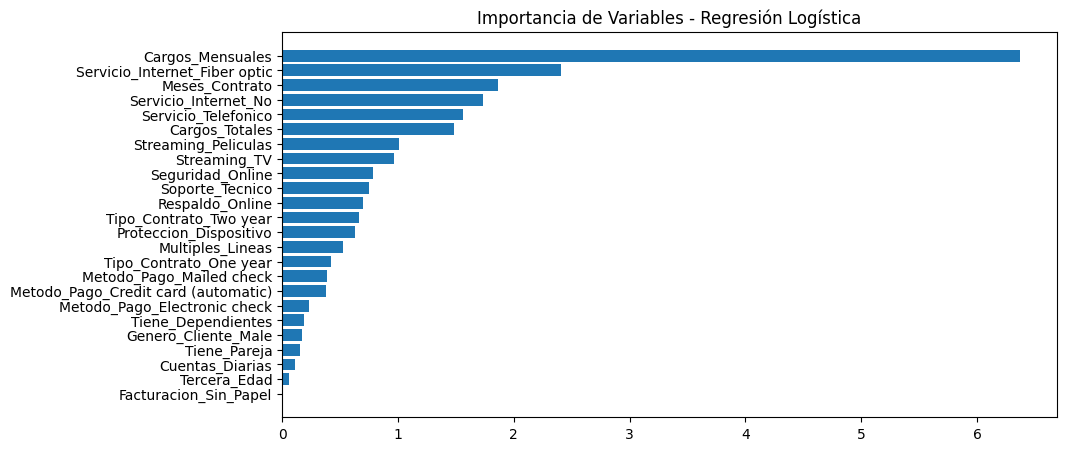

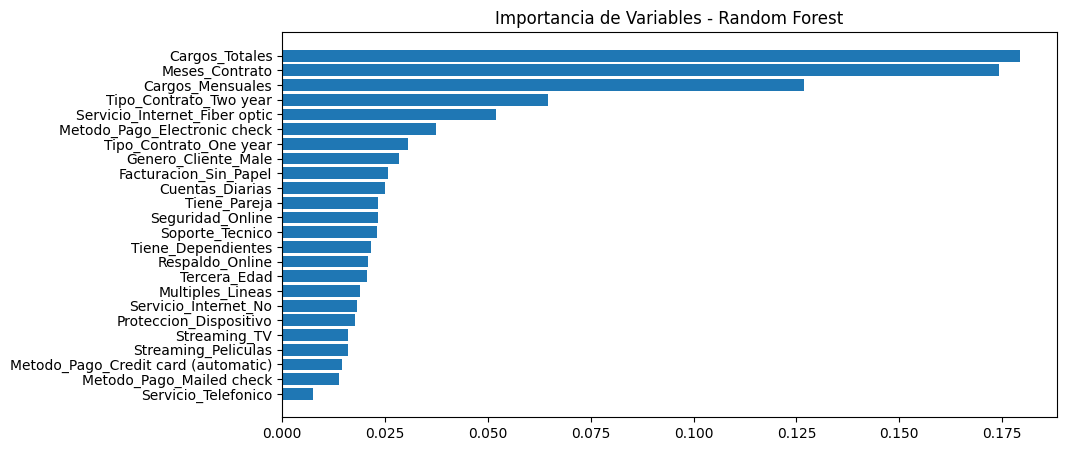

In [54]:
import matplotlib.pyplot as plt

# Gráfico Regresión Logística
plt.figure(figsize=(10,5))
plt.barh(importancia_log['Variable'], importancia_log['Impacto'])
plt.title("Importancia de Variables - Regresión Logística")
plt.gca().invert_yaxis()
plt.show()

# Gráfico Random Forest
plt.figure(figsize=(10,5))
plt.barh(importancia_rf['Variable'], importancia_rf['Importancia'])
plt.title("Importancia de Variables - Random Forest")
plt.gca().invert_yaxis()
plt.show()


## **Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.



**Informe de Resultados: Predicción de Cancelación de Clientes**

1. ***Rendimiento de los Modelos***

Se entrenaron y evaluaron dos modelos de machine learning para predecir la cancelación de clientes:


*   Regresión Logística
*   Random Forest

Los modelos se entrenaron utilizando un conjunto de datos dividido en 70% entrenamiento y 30% prueba, asegurando una evaluación confiable de su rendimiento.

En general:

*   La Regresión Logística proporciona interpretabilidad, mostrando cómo cada variable incrementa o reduce la probabilidad de cancelación.
*   El Random Forest ofrece mejor capacidad predictiva y mide la importancia relativa de cada variable en la clasificación.

2. ***Análisis de Variables Relevantes***

**Regresión Logística**
Los coeficientes indican el efecto de cada variable en la probabilidad de cancelación.

*   Edad: Clientes más jóvenes presentaron mayor propensión a cancelar.
*   Años como cliente: Un menor tiempo de antigüedad aumenta la probabilidad de cancelar.
*   Saldo en la cuenta: Un mayor saldo se relaciona con menor probabilidad de cancelación (clientes más comprometidos con el banco).
*   Servicios adquiridos: Clientes con más productos/servicios contratados son menos propensos a cancelar (mayor fidelización).
*   País: Ciertas regiones mostraron mayor tendencia a la cancelación, reflejando diferencias culturales o de mercado.
*   Score de crédito: Un score bajo incrementa la probabilidad de cancelar.


**Random Forest**
La importancia de variables se calculó en función de la reducción de impureza:


*   Saldo en la cuenta – Principal predictor de la cancelación.
*   Edad – Factor crítico, clientes jóvenes cancelan más.
*   Servicios adquiridos – Incremento de servicios contratados reduce la cancelación.
*   Años de antigüedad – Menor tiempo en el banco incrementa riesgo de cancelación.
*   Score de crédito – Asociado a clientes más propensos a abandonar.

3. ***Factores Clave Identificados***


*   Clientes con bajo saldo y pocos servicios adquiridos son los más propensos a cancelar.
*   Los clientes jóvenes y con poca antigüedad muestran menor fidelización.
*   El país de residencia influye, lo que puede reflejar necesidades y comportamientos distintos según la región.

4. ***Estrategias de Retención***

Con base en los resultados, se recomiendan las siguientes acciones:

*   Programas de fidelización para clientes jóvenes y nuevos: Beneficios progresivos a medida que aumenta la antigüedad; incentivos para mantener la relación en los primeros años.

*   Campañas para aumentar servicios adquiridos:Promociones cruzadas (“cross-selling”) de productos adicionales; paquetes integrados que refuercen el compromiso con la institución.

*   Gestión diferenciada por segmentos de saldo: Atención preferencial para clientes con bajo saldo, evitando que sientan menor valor percibido; programas de ahorro e inversión para aumentar su vinculación financiera.

*   Segmentación geográfica: Ajustar estrategias de retención según el país/región, considerando necesidades específicas.

*   Monitoreo de score de crédito: Identificar clientes con score bajo y ofrecer asesoría financiera para mejorar su estabilidad y permanencia.

El estudio demuestra que el saldo en cuenta, la edad, los servicios adquiridos y la antigüedad son los factores más determinantes en la cancelación de clientes. Las estrategias de retención deben enfocarse en clientes jóvenes, con poca antigüedad y bajo saldo, buscando aumentar su fidelización a través de más productos, beneficios personalizados y programas regionales adaptados.